# Symbolische Mathematik mit SymPy
Das Modul *sympy* ermöglicht es, symbolische Mathematik anzuwenden.

Falls SymPy noch nicht installiert wurde, kann man dies unter Anaconda in einer Anaconda-Konsole nachholen:

*conda install -c anaconda sympy*

Was bedeutet dies? Dazu zuerst eine Gegenüberstellung mit dem *math*-Modul, dem Standardmodul von Python für mathematische Operationen. Im folgenden Code importieren wir sowohl *sympy* als auch *math* und berechnen jeweils die Wurzel aus der Zahl 9. Da wir keine konkreten Funktionen aus den Modulen importieren, müssen wir den Modulnamen als Präfix davorschreiben, was uns hier auch bei der Unterscheidung der beiden Modulen hilft.

In [1]:
import sympy
import math

print(math.sqrt(9))
sympy.sqrt(9)

3.0


3

Beide Ausgaben sehen ganz ähnlich aus: Es wird, wie erwartet, eine 3 ausgegeben. Allerdings sehen wir keine Kommazahl bei der Ausgabe von *sympy*. Um welche Objekte handelt es sich hier?

In [2]:
print(type(math.sqrt(9)))
print(type(sympy.sqrt(9)))

<class 'float'>
<class 'sympy.core.numbers.Integer'>


Die erste Zahl ist vom Typ *float*, einem Standard-Datentyp von Python. Die zweite zahl ist allerdings ein Objekt einer Klasse aus der *sympy*-Bibliothek!
Sehen wir uns ein zweites Beispiel an: Die Wurzel aus 8:

In [3]:
print(math.sqrt(8))
sympy.sqrt(8)

2.8284271247461903


2*sqrt(2)

*sympy* gibt jetzt nicht das (ungenaue) Ergebnis aus, sondern das symbolische Ergebnis $2\sqrt2$ in der $\LaTeX$-Schreibweise. Die Anzahl der Nachkommastellen ist beim Datentyp *float* begrenzt (IEEE754). *sympy* kann hier aber auch eine beliebige Anzahl Nachkommastellen korrekt ausgeben. Wir verwenden hierfür die Methode *evalf*, um 30 Stellen korrekt auszugeben:

In [4]:
sympy.sqrt(8).evalf(40)

2.828427124746190097603377448419396157139

Diese symbolische Berechnung führt auchd dazu, dass wir keine Fehler mehr erhalten, die auf den begrenzten Möglichkeiten der Speicherung von Fließkommazahlen beruhen. Berechnen wir die Wurzel aus 8 und quadrieren dieses Ergebnis, sollte eigentlich wieder 8 herauskommen:

In [5]:
math.sqrt(8)**2

8.000000000000002

Tut es aber nicht! Berechnen wir das Ergebnis mit *sympy*, kommt exakt wieder die Zahl 8 heraus:

In [6]:
sympy.sqrt(8)**2

8

Wollen wir das symbolische Ergebnis als Kommazahl ausgeben, so können wir wie schon gezeigt *evalf* verwenden, oder alternativ die Funktion N():

In [7]:
result = sympy.sqrt(10)
result.evalf()

3.16227766016838

In [8]:
sympy.N(result)

3.16227766016838

## Beispiele mit sympy
*sympy* ist unglaublich mächtig! Es ist sozusagen die kostenlose Version der kommerziellen Tool *Mathematica* oder *Maple*. Einige Funktionen heissen sogar exakt gleich (wie das schon gezeigte *evalf*).

Wir wollen uns hier noch einige Beispiele ansehen, um die Mächtigkeit von *sympy* zu demonstrieren. Wer tiefer einsteigen möchte, dem bieten sich natürlich viele Tutorials im Internet bzw. die Dokumentation auf der Webseite von *sympy* an (https://www.sympy.org/).

Für die folgenden Beispiele importieren wir zuerst die hierfür benötigten Module. Für die "schnelle" Berechnung zwischendurch kann man ausnahmsweise auch einen \* - Import verwenden (aber Vorsicht: Es werden ggf. andere Funktionen oder Klassen dadurch überschrieben!).

In [9]:
## Beispiele für Symbolische Mathematik mit SymPy
# from sympy import *
from sympy import symbols
from sympy.core.function import diff
from sympy.polys.polyfuncs import interpolate
from sympy.integrals.integrals import integrate

Zuerst definieren wir symbolische Variablen. Das geht mit der Methode *symbols*, der wir komma- oder leerzeichengetrennt gleich mehrere Variablennamen übergeben können. Die Methode gibt ein Tupel zurück.

In [10]:
# Definiere symbolische Variablen
x = symbols("x")

## auch möglich
x, y = symbols("x y")
print(type(x))

<class 'sympy.core.symbol.Symbol'>


Wir definieren eine Funktion $f$ mit $f(x)=3x^2-2x+5$

In [11]:
f = 3*x**2 - 2*x + 5
f

3*x**2 - 2*x + 5

Wie lautet die erste Ableitung dieser Funktion? Ermitteln wir diese mit der Funktion *diff*:

In [12]:
diff(f)

6*x - 2

Welchen Wert hat die 1. Ableitung an der Stelle $x=3$?

In [13]:
diff(f).evalf(subs={x:3})

16.0000000000000

Mit der Funktion *integrate* können wir das unbestimmte Integral unserer Funktion $f(x)$ ermitteln, also $\int_{}^{}x^3-x^2+5xdx$. Das Ergebnis ist $x^3-x^2+5x\, (+c)$

In [14]:
integrate(f)

x**3 - x**2 + 5*x

*integrate* kann als weiteres Argument ein Tupel entgegennehmen, das als erstes die Variable, nach der Integriert werden soll, sowie die untere und obere Grenze des bestimmten Integrals enthält. Wir wollen beispielsweise das Integral von $f(x)$ für den Bereich 0 bis 5 ausrechnen, also

$\int_{0}^{5}x^3-x^2+5xdx$

so liefert uns *integrate* das Ergebnis 125:

In [15]:
integrate(f, (x,0,5))

125

Nehmen wir an, wir kennen unser Polynom $f(x)$ gar nicht, sondern nur empirisch ermittelte Messwerte und wollen ein Polynom erstellen, das sich möglichst exakt durch die gemessenen Punkte bewegt. Hier hilft die Funktion *interpolate*. Als erstes Beispiel geben wir für $y$ die Werte 1, 4 und 9 an. Beginnen die x-Werte bei 1 und werden jeweils inkrementiert, braucht man diese nicht extra anzugeben:

In [16]:
interpolate((1,4,9),x)

x**2

In [17]:
interpolate((6,13,26),x)

3*x**2 - 2*x + 5

Zuletzt wollen wir noch eine Gleichung lösen: Berechne die Nullstellen der Funktion

$f(x)=x^2-2x-8$

In [18]:
from sympy import *
solve(x**2-2*x-8)

[-2, 4]

## Beispiel: Berechnen der Länge einer Kurve
Wir wollen die Länge der Kurve für die Funktion $f(x) = \frac{1}{2}(e^x+e^{-x})$ im Bereich von $[-2;2]$ berechnen.

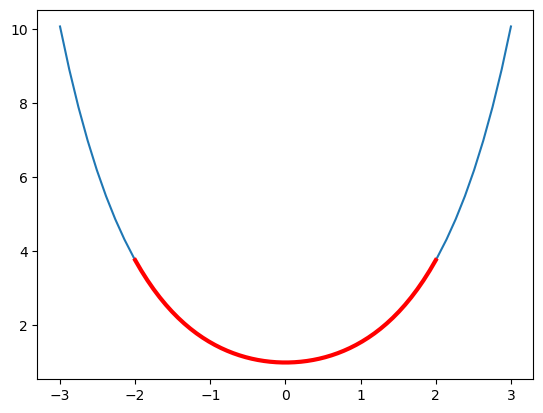

In [19]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-3,3,50)
xb = np.linspace(-2,2,50)

y = [1/2*(np.exp(x)+np.exp(-x)) for x in x]
yb = [1/2*(np.exp(x)+np.exp(-x)) for x in xb]

plt.plot(x,y)
plt.plot(xb,yb, c="r", linewidth=3)
plt.show()

Die Formel für die Berechnung der Länge eines Kurvenstücks lautet:

$L = \int_{a}^{b}\sqrt{1+(f'(x))^2}$

Mit *sympy* lässt sich die Länge einfach berechnen:

In [20]:
import sympy

# Wir beschränken die symbolische Variable x auf reele Zahlen (also keine komplexen), dies beschleunigt die Berechnung. 
x = sympy.symbols("x", real=True)

# Die Funktion für die Berchnung einer Kurve. Wir verwenden sympy.Rational, um den Bruch 1/2 nicht als Fließkommazahl, sondern als sympy-Objekt zu erstellen.
f = sympy.Rational(1,2) * (sympy.exp(x)+sympy.exp(-x))

# 1. Ableitung bestimmen. Die Methode doit() wertet den Ausdruck direkt aus.
deriv = sympy.diff(f,x).doit()

# Bestimme das Integral in den Grenzen von -2 bis 2
length = sympy.Integral(sympy.sqrt(1+deriv**2), (x,-2,2))
length

Integral(sqrt((exp(x)/2 - exp(-x)/2)**2 + 1), (x, -2, 2))

Schließlich wandeln wir dieses Ergebnis noch in einen numerischen Wert um:

In [21]:
N(length)

7.25372081569404